In [ ]:
# !pip install visualise-spacy-tree
!pip install wordcloud

In [ ]:
# IAP are phrases that appear more in business 1(random)'s reviews but less often in other business reviews
import pandas as pd
import random
import spacy
import nltk
import matplotlib.pyplot as plt

from spacy import displacy 
# import visualise_spacy_tree
from IPython.display import Image, display
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud

nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
stemmer = SnowballStemmer("english")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd "/content/drive/My Drive/NLP CZ4045/Datasets/"

!pip install import-ipynb
!pip install ipynb

import sys
sys.path.append('/content/drive/My Drive/NLP CZ4045/Datasets/')

/content/drive/.shortcut-targets-by-id/1IGRaZtn9SsUy5O6DIW6exasir4ARMioV/NLP CZ4045/Datasets


In [ ]:
# read dataset
df = pd.read_json('reviewSelected100.json', encoding = "ISO-8859-1", lines=True)

# ensure no null values in table
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15300 entries, 0 to 15299
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    15300 non-null  object        
 1   user_id      15300 non-null  object        
 2   business_id  15300 non-null  object        
 3   stars        15300 non-null  int64         
 4   useful       15300 non-null  int64         
 5   funny        15300 non-null  int64         
 6   cool         15300 non-null  int64         
 7   text         15300 non-null  object        
 8   date         15300 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.1+ MB


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11


In [ ]:
# preprocessing - tokenise, stem, stop words removal on reviews to get key information

# stops = set(stopwords.words("english")) 

def preprocess_clean(texts):
    cleaned = []
    tokens = nlp(texts.lower()) # get list of tokens from a single review
    for token in tokens:
        token_s = str(token)
        if token_s.isalpha(): # tokens are all alphabets and not stopwords
            if len(token_s) >1: 
                cleaned.append(token)
    return cleaned

In [ ]:
df_new = df.drop(['review_id', 'stars', 'useful', 'funny', 'cool', 'date'], axis=1)
df_new.head()

processed_df_new = df_new
# approx. ~12 minutes for preprocessing of 15k rows
processed_df_new['reviews_clean'] = df_new['text'].apply(preprocess_clean)
processed_df_new.head()



,user_id,business_id,text,reviews_clean
0,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,We had my Mother's Birthday Party here on 10/2...,"[we, had, my, mother, birthday, party, here, o..."
1,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,Good Korean grill near Eaton Centre. The marin...,"[good, korean, grill, near, eaton, centre, the..."
2,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,Was recommended to try this place by few peopl...,"[was, recommended, to, try, this, place, by, f..."
3,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,Ambience: Would not expect something this nice...,"[ambience, would, not, expect, something, this..."
4,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,Absolutely the WORST pool company that I have ...,"[absolutely, the, worst, pool, company, that, ..."


In [ ]:
# set seed for consistency
random.seed(9)
value = random.randint(0, processed_df_new.shape[0])

# get a random business id
random_row = str(processed_df_new['business_id'][value])
print("Random business selected: " + random_row)

# information of business - identifying anomalies in dataset (e.g null values)
df_b1 = processed_df_new.loc[processed_df_new['business_id'] == random_row] # get all reviews of b1
df_b1.info()

print("__________________\nTotal number of reviews is: " + str(len(df_b1)))
df_b1.head()

Random business selected: daqYMX3Y4QR8xl-BUlYBPw
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 7201 to 8499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        100 non-null    object
 1   business_id    100 non-null    object
 2   text           100 non-null    object
 3   reviews_clean  100 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB
__________________
Total number of reviews is: 100


,user_id,business_id,text,reviews_clean
7201,0mKUbIUXOvH0cHcGQ1KGqg,daqYMX3Y4QR8xl-BUlYBPw,I postponed writing my review of Tortas Paquim...,"[postponed, writing, my, review, of, tortas, p..."
7210,edr7yu77z7KbZKz-ag-DQg,daqYMX3Y4QR8xl-BUlYBPw,Where to start. I love this food but now prefe...,"[where, to, start, love, this, food, but, now,..."
7213,G3g5OdmKI3kWTZCnLXJ0Nw,daqYMX3Y4QR8xl-BUlYBPw,"This place is awesome! Ice cream, tortas, taco...","[this, place, is, awesome, ice, cream, tortas,..."
7215,0Dj0UyV7bMGWhSKyJ2ZOgg,daqYMX3Y4QR8xl-BUlYBPw,Tried this place out on the recommendation of ...,"[tried, this, place, out, on, the, recommendat..."
7239,ChEJPNaDMHCDuGbk7b3y1g,daqYMX3Y4QR8xl-BUlYBPw,hands down my favorite place. im from Chihuahu...,"[hands, down, my, favorite, place, from, chihu..."


In [ ]:
# Chin Voon

# df_b1['reviews_clean'] = df_b1['text'].apply(preprocess_clean)

reviews = df_b1['reviews_clean'].to_frame().reset_index(drop= True)
# reviews.insert(0, "business_id", df['business_id'].values.tolist())

reviews.head()

,reviews_clean
0,"[postponed, writing, my, review, of, tortas, p..."
1,"[where, to, start, love, this, food, but, now,..."
2,"[this, place, is, awesome, ice, cream, tortas,..."
3,"[tried, this, place, out, on, the, recommendat..."
4,"[hands, down, my, favorite, place, from, chihu..."


ref: https://www.analyticsvidhya.com/blog/2020/06/nlp-project-information-extraction/


ref: https://spacy.io/usage/linguistic-features

In [ ]:
# kunyoung
# POS Tagging
def spacy_pos_tagging(sentence):
  try:
    tagged_sentence = []
    for i in sentence:
      tagged_sentence.append([(str(i),i.pos_)])
    return tagged_sentence

  except Exception as e:
    print(str(e))

review_list = reviews['reviews_clean'].tolist()
review_pos_list = []
for i in review_list:
  pos_sentence = spacy_pos_tagging(i)
  review_pos_list.append(pos_sentence)

In [ ]:
# kunyoung
# extract adjective phrases - Head-final adjective phrases, Head-initial adjective phrases, Head-medial adjective phrases

def extract_adj_phrases(pos_sentence_list):
  adjective_list = []
  for i in pos_sentence_list:
    len_sentence = len(i)
    for j in range(len_sentence):
      if i[j][0][1] == 'ADV' and j<len_sentence-1:
        if i[j+1][0][1] == 'ADJ' and j<len_sentence-2: 
          adjective_list.append([i[j][0][0],i[j+1][0][0]]) #Head-final adjective phrases
          if i[j+2][0][1] == 'ADP' and j<len_sentence-3:
            if (i[j+3][0][1] == 'PROPN' or i[j+3][0][1] == 'NOUN' or i[j+3][0][1] == 'PRON') and j<len_sentence-4:
              adjective_list.append([i[j][0][0],i[j+1][0][0],i[j+2][0][0],i[j+3][0][0]]) #Head-medial adjective phrases           
      if i[j][0][1] == 'ADJ' and j<len_sentence-1:
        if i[j+1][0][1] == 'ADP' and j<len_sentence-2:
          if i[j+2][0][1] == 'ADP' and j<len_sentence-3:
            adjective_list.append([i[j][0][0],i[j+1][0][0],i[j+2][0][0]]) #Head-initial adjective phrases
  return adjective_list

adjective_list = extract_adj_phrases(review_pos_list)
adjective_list


[['very', 'fresh'],
 ['very', 'good'],
 ['fairly', 'quick'],
 ['very', 'reasonable'],
 ['so', 'good'],
 ['very', 'good'],
 ['too', 'greasy'],
 ['too', 'loud'],
 ['very', 'hot'],
 ['so', 'much'],
 ['pretty', 'sure'],
 ['so', 'small'],
 ['very', 'clean'],
 ['pretty', 'small'],
 ['really', 'good'],
 ['really', 'good'],
 ['much', 'better'],
 ['pretty', 'average'],
 ['so', 'close'],
 ['as', 'authentic'],
 ['there', 'fresh'],
 ['really', 'good'],
 ['very', 'good'],
 ['spotlessly', 'clean'],
 ['spotlessly', 'clean', 'in', 'fact'],
 ['very', 'nice'],
 ['completely', 'bilingual'],
 ['only', 'good'],
 ['pretty', 'cheap'],
 ['very', 'delish'],
 ['very', 'tasty'],
 ['very', 'good'],
 ['how', 'busy'],
 ['how', 'many'],
 ['very', 'clean'],
 ['equally', 'delicious'],
 ['very', 'pleased'],
 ['very', 'high'],
 ['more', 'authentic'],
 ['very', 'few'],
 ['very', 'long'],
 ['little', 'disappointed'],
 ['seriously', 'excellent'],
 ['very', 'good'],
 ['here', 'real'],
 ['relatively', 'fast'],
 ['there', 'la

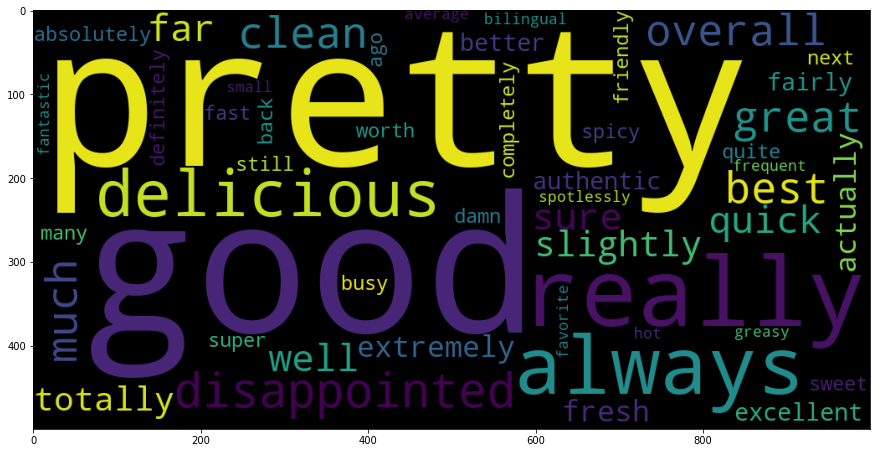

In [ ]:
string =""
for x in adjective_list:  # concatenate all strings in list
  a = " ".join(x)
  string += a + " "

wordcloud = WordCloud(width = 1000, height = 500, max_words = 50).generate(string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)


In [ ]:
# kunyoung
# count and show the most recurring adjective phrases

def count_adj_phrases(adj_list):
  count_list = []
  for i in adj_list:
    count_list.append([i,adj_list.count(i)])
  return_list = []
  for j in count_list:
    if j not in return_list:
      return_list.append(j)
  return return_list

def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1])
    return sub_li

adjective_list_count = count_adj_phrases(adjective_list)
adjective_list_count = Sort(adjective_list_count)
adjective_list_count.reverse()
adjective_list_count

[[['very', 'clean'], 8],
 [['very', 'good'], 8],
 [['so', 'good'], 4],
 [['pretty', 'good'], 3],
 [['really', 'good'], 3],
 [['very', 'creamy'], 2],
 [['very', 'busy'], 2],
 [['totally', 'disappointed'], 2],
 [['slightly', 'spicy'], 2],
 [['so', 'delicious'], 2],
 [['very', 'small'], 2],
 [['how', 'busy'], 2],
 [['very', 'tasty'], 2],
 [['only', 'good'], 2],
 [['very', 'nice'], 2],
 [['much', 'better'], 2],
 [['fairly', 'quick'], 2],
 [['very', 'casual'], 1],
 [['fast', 'friendly'], 1],
 [['back', 'next'], 1],
 [['now', 'clean'], 1],
 [['super', 'clean'], 1],
 [['very', 'little'], 1],
 [['extremely', 'rude'], 1],
 [['very', 'delicious'], 1],
 [['really', 'delicious'], 1],
 [['very', 'modern'], 1],
 [['very', 'impressed', 'with', 'service'], 1],
 [['very', 'impressed'], 1],
 [['very', 'excellent'], 1],
 [['quite', 'good'], 1],
 [['here', 'few'], 1],
 [['always', 'clean'], 1],
 [['too', 'bad'], 1],
 [['so', 'full'], 1],
 [['basically', 'fresh'], 1],
 [['more', 'familiar'], 1],
 [['highly

In [ ]:
len(processed_df_new['business_id'].unique().tolist())


153

In [ ]:
#find indicative adjective phrases where the phrases appear often in one review, but relatively less often in other reviews
relative_fraction = 0.5

def get_adjective_list (business_id):
  print()
  print("Business selected: " + business_id)
  df_b = processed_df_new.loc[processed_df_new['business_id'] == business_id] # get all reviews of b1
  # df_b['reviews_clean'] = df_b['text'].apply(preprocess_clean)

  # reviews = df_b['reviews_clean'].to_frame().reset_index(drop= True)
  review_list = df_b['reviews_clean'].tolist()
  review_pos_list = []
  for i in review_list:
    pos_sentence = spacy_pos_tagging(i)
    review_pos_list.append(pos_sentence)
  adjective_list = extract_adj_phrases(review_pos_list)
  adjective_list_count = count_adj_phrases(adjective_list)
  adjective_list_count = Sort(adjective_list_count)
  adjective_list_count.reverse()
  return adjective_list_count

# basically to get a dictionary where the key is the adjective phrase, and the value is the list of business ids which have the adjective phrase(key) often in their respective reviews
def find_indicative_adjective_phrase(relative_fraction):
  # string =""
  phrase_count_dict={}
  unique_id_list = processed_df_new['business_id'].unique().tolist()

  #run through every business id to get the adjective_list_count
  for unique_id in unique_id_list:
    adjective_list_count=get_adjective_list(unique_id)

    # for example, in a adjective_list_count, if 7 is the highest count and 1 is the lowest count, dividing_number will be 5
    # 1,2,3,4,5,6,7
    dividing_number = int((adjective_list_count[0][1]+adjective_list_count[-1][1])*relative_fraction)+1
    print(dividing_number)
    for adjective in adjective_list_count:
      if (adjective[1]>=dividing_number):
        print(adjective)

        # string += " ".join(adjective[1]) + " "
        actual_adjective_phrase = " ".join(adjective[0])
        phrase_count_dict.setdefault(actual_adjective_phrase,[]).append(unique_id)

  print("\n----Processing finished----")
  return phrase_count_dict
  
  


In [ ]:
phrase_count_dict = find_indicative_adjective_phrase(relative_fraction)


Business selected: ZBE-H_aUlicix_9vUGQPIQ
5
[['very', 'good'], 7]
[['pretty', 'good'], 5]

Business selected: e-YnECeZNt8ngm0tu4X9mQ
5
[['so', 'much'], 7]
[['pretty', 'good'], 5]

Business selected: j7HO1YeMQGYo3KibMXZ5vg
5
[['pretty', 'good'], 8]
[['really', 'good'], 7]
[['very', 'friendly'], 6]
[['so', 'good'], 6]
[['too', 'salty'], 5]
[['very', 'nice'], 5]

Business selected: 7e3PZzUpG5FYOTGt3O3ePA
9
[['very', 'good'], 16]

Business selected: vuHzLZ7nAeT-EiecOkS5Og
4
[['very', 'knowledgeable'], 6]

Business selected: k99YNCx5KcQPR7oeTgAOzg
4
[['very', 'good'], 6]

Business selected: hXzoNgpkC86K_Jfg_zMHvA
4
[['very', 'good'], 6]
[['really', 'good'], 6]
[['very', 'nice'], 5]

Business selected: wPgp3oddFUzpGrQc__HYhg
4
[['very', 'clean'], 5]

Business selected: QeEQXdto_4wFRaNKyIygRA
4
[['pretty', 'good'], 6]
[['very', 'good'], 5]
[['very', 'nice'], 4]
[['very', 'attentive'], 4]
[['very', 'friendly'], 4]

Business selected: a4GRh1TlOVhPD401mSPLZg
5
[['so', 'nice'], 7]
[['very', 'nic

In [ ]:
print(string)

fairly quick also greasy also hot ever authentic pretty sure also frequent pretty small really good really good much better pretty average also fantastic always excellent really good absolutely best still favorite spotlessly clean completely bilingual pretty cheap far best equally delicious little disappointed seriously excellent possibly worst far best relatively fast ago ok least lower always dirty definitely worth overall best really distinct apart aquas almost many anywhere clean overall pleasant probably many also homemade kinda loud well worth ago sure perfectly ripe damn good slightly spicy slightly spicy totally fair overall great together needless forward next pretty plain pretty trashy real busy totally disappointed back sure overall good extremely friendly anyway fresh always fresh pretty decent also good much short much better quite yummy pretty good extremely dry even busy completely underwhelming actually mine still good always delicious really great amazingly delicious d

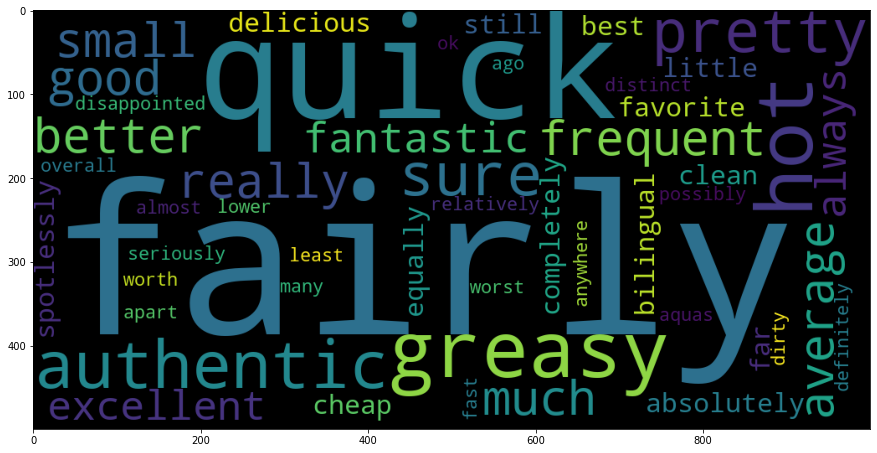

In [ ]:
def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist

wordcloud = WordCloud(width = 1000, height = 500, max_words= 50).generate(' '.join(unique_list(string.split())))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [ ]:
random_business_id = "CQxhyLM833WF45yrS9yeAA"
# random.seed(9)
# print(phrase_count_dict)
value = random.randint(0, df.shape[0])
# random_business_id = str(df['business_id'][value])
print("Random business selected: " + random_business_id)
for key,value in phrase_count_dict.items():
  #relatively less often in other business'reviews

  if (len(value)==1 and random_business_id in value):
    print(key)
    print(value)

Random business selected: CQxhyLM833WF45yrS9yeAA
so grateful
['CQxhyLM833WF45yrS9yeAA']
so kind
['CQxhyLM833WF45yrS9yeAA']
most comfortable
['CQxhyLM833WF45yrS9yeAA']
as much
['CQxhyLM833WF45yrS9yeAA']
very grateful
['CQxhyLM833WF45yrS9yeAA']
very difficult
['CQxhyLM833WF45yrS9yeAA']


In [ ]:
df_b1 = df.loc[df['business_id'] == "CQxhyLM833WF45yrS9yeAA"] # get all reviews of b1
df_b1.info()

print("__________________\nTotal number of reviews is: " + str(len(df_b1)))
for index,row in df_b1[:].iterrows():
  print(row['text'])
# df_b1['text'].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1800 to 3088
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    100 non-null    object        
 1   user_id      100 non-null    object        
 2   business_id  100 non-null    object        
 3   stars        100 non-null    int64         
 4   useful       100 non-null    int64         
 5   funny        100 non-null    int64         
 6   cool         100 non-null    int64         
 7   text         100 non-null    object        
 8   date         100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 7.8+ KB
__________________
Total number of reviews is: 100
I couldn't have asked for a better experience for my family.  Anyone who has had to make this terribly difficult decision knows the heartbreak and stress.  My experience started with making the most difficult phone call which was ans